In [76]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# reading copper data
df = pd.read_csv('copper_set.csv',  low_memory=False)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401.0,887.00
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701.0,904.00
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401.0,795.00
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701.0,971.00


In [3]:
# display columns
columns = df.columns
columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [4]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     14458
product_ref          1
delivery date        1
selling_price        1
dtype: int64

In [5]:
ids = df['id'].unique()
ids
len(ids)

33540

In [6]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             1
country              1
status               1
item type            1
application          1
thickness            1
width                1
material_ref     14458
product_ref          1
delivery date        1
selling_price        1
dtype: int64

In [7]:
# fill null values in customer
customer_mode = df['customer'].mode()[0]
df['customer'].fillna(customer_mode, inplace = True)

In [8]:
# fill null values in country
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [9]:
# fill null values in application
df['application'] = df['application'].fillna(df['application'].mode()[0])

In [10]:
# fill null values in thickness
df['thickness'] = df['thickness'].fillna(df['thickness'].mode()[0])

In [11]:
# fill null values in delivery date
df['item_date'] = df['item_date'].fillna(df['item_date'].mode()[0])

In [12]:
# fill null values in delivery date
df['delivery date'] = df['delivery date'].fillna(df['delivery date'].mode()[0])

In [13]:
# fill null values in selling_price
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mode()[0])

In [14]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               1
item type            1
application          0
thickness            0
width                1
material_ref     14458
product_ref          1
delivery date        0
selling_price        0
dtype: int64

In [15]:
len(df['customer'].unique())

794

In [16]:
# change item date float to int
df['item_date'] = df['item_date'].apply(lambda x: str(int(x)))

In [17]:
# change delivery date float to int
df['delivery date'] = df['delivery date'].apply(lambda x: str(int(x)))

In [18]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.00
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.00
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.00
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.00


In [19]:
df = df[df['item_date'].str.match(r'\d{8}')]

In [20]:
df = df[df['delivery date'].str.match(r'\d{8}')]

In [21]:
# Rename the 'delivery date' to 'delivery_date'
df = df.rename(columns={'delivery date': 'delivery_date'})
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.00
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.00
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.00
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.00


In [22]:
# Remove rows where the last four digits of 'item_date' are all zeros
df = df[~(df['item_date'].astype(str).str[-4:] == '0000')]

In [23]:
# Remove rows where the last four digits of 'delivery_date' are all zeros
df = df[~(df['delivery_date'].astype(str).str[-4:] == '0000')]

In [24]:
for row in df.itertuples():
  try:
    # Convert the date strings to datetime objects
    date1 = datetime.strptime(row.item_date, '%Y%m%d')
    date2 = datetime.strptime(row.delivery_date, '%Y%m%d')

    # Calculate the number of days between the two dates
    delta = date2 - date1
    # Add a new 'duration' column to the DataFrame with the calculated duration
    df.at[row.Index, 'duration'] = delta.days
  except ValueError:
    # Handle rows with invalid date formats (e.g., skip them)
    pass
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,duration
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401,1047.00,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101,644.33,-90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101,768.00,-90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301,577.00,-31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.00,37.0
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.00,128.0
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.00,37.0
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.00,128.0


In [25]:
# Remove rows where 'duration' is 0 or negative
df = df[df['duration'] > 0]
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,duration
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.0,91.0
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,6.119930e+05,20210701,18.0,91.0
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1.668701e+09,20210701,1363.0,91.0
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,20210401,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_1125_0.4,6.119930e+05,20210701,17.0,91.0
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,20210401,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,NaN,1.641416e+08,20210701,1098.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.0,37.0
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.0,128.0
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.0,37.0
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.0,128.0


In [26]:
# Function to convert values with scientific notation to float
def convert_to_float(value):
    if pd.notna(value):
        # Remove non-numeric characters and convert to float
        cleaned_value = re.sub(r'[^0-9eE\+\-\.]', '', str(value))
        try:
            return float(cleaned_value)
        except ValueError:
            return None
    else:
        return value

# Apply the conversion function to the column
df['quantity tons'] = df['quantity tons'].apply(convert_to_float)

# Print the cleaned DataFrame
print(df)

                                         id item_date  quantity tons  \
0      EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401      54.151139   
6      E1B47219-42C8-411D-AE46-AD5256DC4757  20210401       3.522613   
8      2851F48B-DA32-4DF3-884B-17A3100DD65A  20210401      69.071853   
10     B85870F5-E1C7-4CAA-A7DA-355DC192B11D  20210401       9.175770   
12     EE7EE006-15B3-47A5-A48D-70D54C6B734C  20210401      27.512545   
...                                     ...       ...            ...   
33535  0604E816-481D-48F3-B79B-8693E40BAD6A  20210223      21.790137   
33536  DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D  20210223     750.252104   
33537  C31F3F50-9F0B-485F-8862-C4FD180EB5B6  20210223     308.938412   
33538  BAF1E3E1-399B-4CED-B1D1-84C746DACB7C  20210223     754.754355   
33539  F327E357-9D24-4E5D-838D-407166725F70  20210223      16.000000   

         customer  country   status item type  application  thickness   width  \
0      30156308.0     28.0      Won         W         

<ipython-input-26-d2874d2549d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity tons'] = df['quantity tons'].apply(convert_to_float)


In [27]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,duration
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.0,91.0
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,6.119930e+05,20210701,18.0,91.0
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1.668701e+09,20210701,1363.0,91.0
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,20210401,9.175770,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_1125_0.4,6.119930e+05,20210701,17.0,91.0
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,20210401,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,NaN,1.641416e+08,20210701,1098.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77.0,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.0,37.0
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26.0,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.0,128.0
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78.0,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.0,37.0
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26.0,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.0,128.0


In [28]:
df.isnull().sum()

id                   1
item_date            0
quantity tons        0
customer             0
country              0
status               1
item type            1
application          0
thickness            0
width                1
material_ref     14114
product_ref          1
delivery_date        0
selling_price        0
duration             0
dtype: int64

In [29]:
# Change the data type
df['country'] = df['country'].astype(int)
df['application'] = df['application'].astype(float)
df['thickness'] = df['thickness'].astype(float)
df['width'] = df['width'].astype(float)
df['duration'] = df['duration'].astype(int)

<ipython-input-29-ee5a05a7278e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].astype(int)
<ipython-input-29-ee5a05a7278e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['application'] = df['application'].astype(float)
<ipython-input-29-ee5a05a7278e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [30]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price,duration
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701,854.0,91
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401,3.522613,30209509.0,30,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,6.119930e+05,20210701,18.0,91
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401,69.071853,30341428.0,38,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1.668701e+09,20210701,1363.0,91
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,20210401,9.175770,30209509.0,30,Draft,W,41.0,0.38,1125.0,NBW_L+_1125_0.4,6.119930e+05,20210701,17.0,91
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,20210401,27.512545,30165529.0,78,Won,W,10.0,0.75,1250.0,NaN,1.641416e+08,20210701,1098.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33535,0604E816-481D-48F3-B79B-8693E40BAD6A,20210223,21.790137,30161540.0,77,Won,W,15.0,1.80,865.0,NaN,1.670799e+09,20210401,887.0,37
33536,DDBCE9E8-567A-4B8A-9F6B-8D8405560B6D,20210223,750.252104,30199179.0,26,Revised,PL,10.0,0.75,1121.0,NaN,6.283770e+05,20210701,904.0,128
33537,C31F3F50-9F0B-485F-8862-C4FD180EB5B6,20210223,308.938412,30160005.0,78,Won,W,41.0,3.00,1500.0,NaN,6.406650e+05,20210401,795.0,37
33538,BAF1E3E1-399B-4CED-B1D1-84C746DACB7C,20210223,754.754355,30199179.0,26,Revised,PL,10.0,0.51,1286.0,NaN,6.283770e+05,20210701,971.0,128


In [31]:
# Remove rows with NaN values (failed conversions)
df = df.dropna(subset=['quantity tons'])

In [32]:
# drop rows with null status
df = df.dropna(subset=['status'])

In [33]:
df = df.dropna(subset=['id'])

In [34]:
columns = df.columns
columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery_date', 'selling_price', 'duration'],
      dtype='object')

In [35]:
# Remove multiple columns using drop()
columns_to_remove = ['id', 'item_date','customer','material_ref','product_ref', 'delivery_date' ]
df = df.drop(columns=columns_to_remove)
df

,quantity tons,country,status,item type,application,thickness,width,selling_price,duration
0,54.151139,28,Won,W,10.0,2.00,1500.0,854.0,91
6,3.522613,30,Draft,W,41.0,0.38,1125.0,18.0,91
8,69.071853,38,Won,S,10.0,0.60,1275.0,1363.0,91
10,9.175770,30,Draft,W,41.0,0.38,1125.0,17.0,91
12,27.512545,78,Won,W,10.0,0.75,1250.0,1098.0,91
...,...,...,...,...,...,...,...,...,...
33534,67.632737,27,Won,S,56.0,6.99,1230.0,797.0,67
33535,21.790137,77,Won,W,15.0,1.80,865.0,887.0,37
33536,750.252104,26,Revised,PL,10.0,0.75,1121.0,904.0,128
33537,308.938412,78,Won,W,41.0,3.00,1500.0,795.0,37


In [36]:
# Remove rows where 'status' is neither 'Won' nor 'Lost'
valid_values = ['Won', 'Lost']
df = df[df['status'].isin(valid_values)]
df

,quantity tons,country,status,item type,application,thickness,width,selling_price,duration
0,54.151139,28,Won,W,10.0,2.00,1500.0,854.00,91
8,69.071853,38,Won,S,10.0,0.60,1275.0,1363.00,91
12,27.512545,78,Won,W,10.0,0.75,1250.0,1098.00,91
13,32.235317,27,Won,S,10.0,0.60,1010.0,973.00,91
17,20.807114,30,Won,W,10.0,0.45,900.0,1315.19,91
...,...,...,...,...,...,...,...,...,...
33532,109.471924,27,Won,S,56.0,4.00,1278.0,789.00,67
33533,3.801811,78,Won,W,41.0,2.50,900.0,803.00,37
33534,67.632737,27,Won,S,56.0,6.99,1230.0,797.00,67
33535,21.790137,77,Won,W,15.0,1.80,865.0,887.00,37


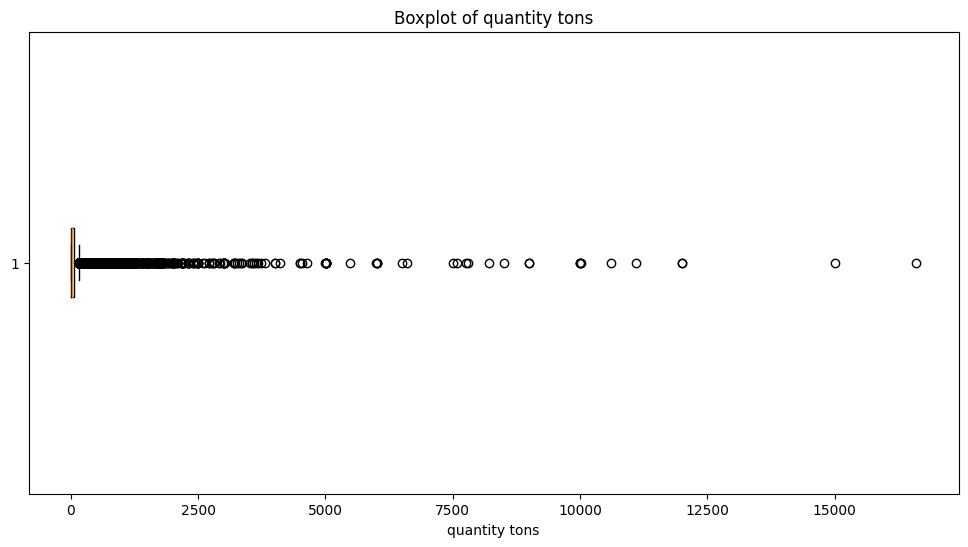

In [37]:
# Create a boxplot for quantity
plt.figure(figsize=(12, 6))
plt.boxplot(df['quantity tons'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('quantity tons')
plt.title('Boxplot of quantity tons')
plt.show()

In [38]:
# Log-transform the 'quantity' column
df['log_quantity'] = np.log(df['quantity tons'])
df

<ipython-input-38-035cc53d1ea3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_quantity'] = np.log(df['quantity tons'])


,quantity tons,country,status,item type,application,thickness,width,selling_price,duration,log_quantity
0,54.151139,28,Won,W,10.0,2.00,1500.0,854.00,91,3.991779
8,69.071853,38,Won,S,10.0,0.60,1275.0,1363.00,91,4.235147
12,27.512545,78,Won,W,10.0,0.75,1250.0,1098.00,91,3.314642
13,32.235317,27,Won,S,10.0,0.60,1010.0,973.00,91,3.473063
17,20.807114,30,Won,W,10.0,0.45,900.0,1315.19,91,3.035295
...,...,...,...,...,...,...,...,...,...,...
33532,109.471924,27,Won,S,56.0,4.00,1278.0,789.00,67,4.695668
33533,3.801811,78,Won,W,41.0,2.50,900.0,803.00,37,1.335478
33534,67.632737,27,Won,S,56.0,6.99,1230.0,797.00,67,4.214092
33535,21.790137,77,Won,W,15.0,1.80,865.0,887.00,37,3.081457


In [39]:
# Calculate the quartiles and IQR
Q1 = df['log_quantity'].quantile(0.25)
Q3 = df['log_quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the number of outliers
outliers = df[(df['log_quantity'] < lower_bound) | (df['log_quantity'] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers: {num_outliers}')

Number of outliers: 656


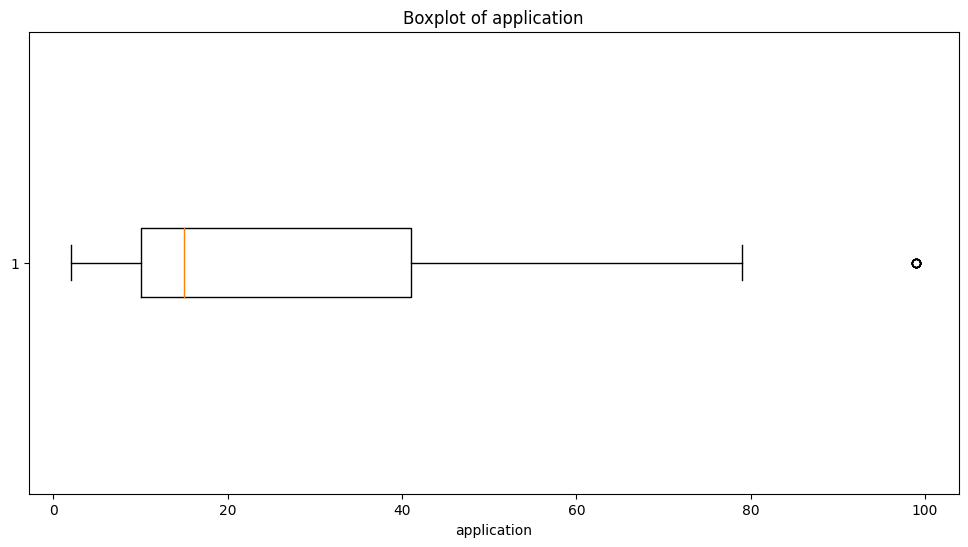

In [40]:
# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['application'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('application')
plt.title('Boxplot of application')
plt.show()

In [41]:
# Calculate the quartiles and IQR
Q1 = df['application'].quantile(0.25)
Q3 = df['application'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the number of outliers
outliers = df[(df['application'] < lower_bound) | (df['application'] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers: {num_outliers}')

Number of outliers: 8


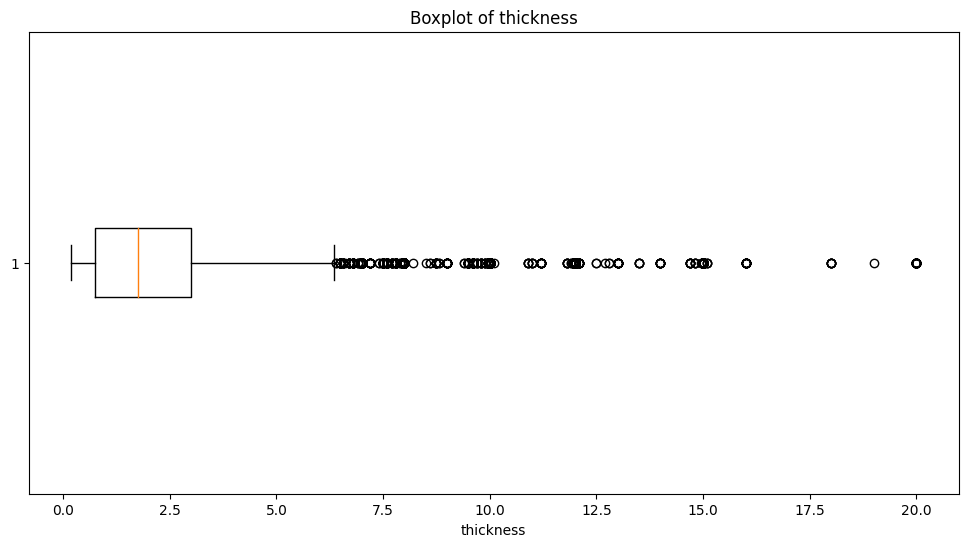

In [42]:
# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['thickness'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('thickness')
plt.title('Boxplot of thickness')
plt.show()

In [43]:
# Log-transform the 'thickness' column
df['log_thickness'] = np.log(df['thickness'])

<ipython-input-43-ec9caa2acebb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_thickness'] = np.log(df['thickness'])


In [44]:
# Calculate the quartiles and IQR
Q1 = df['log_thickness'].quantile(0.25)
Q3 = df['log_thickness'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the number of outliers
outliers = df[(df['log_thickness'] < lower_bound) | (df['log_thickness'] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers: {num_outliers}')

Number of outliers: 0


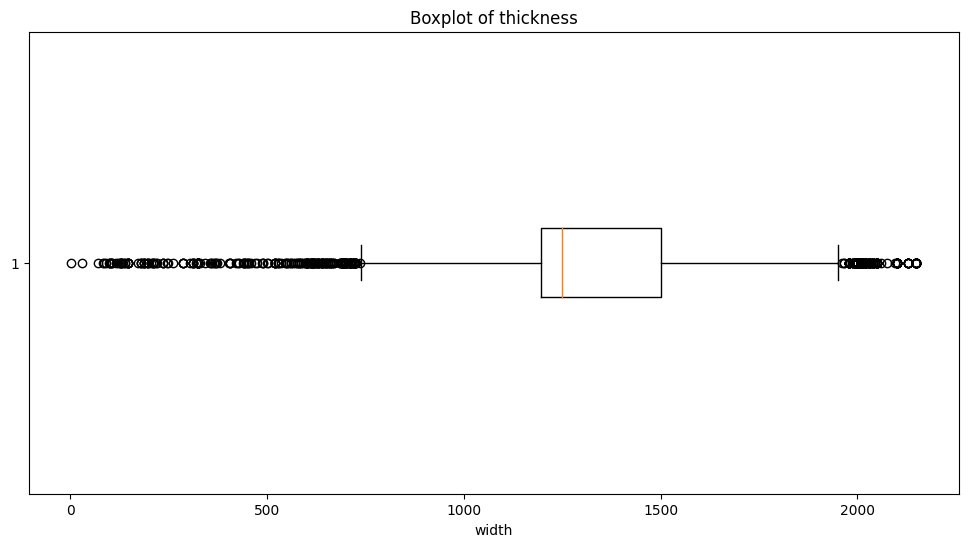

In [45]:
# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['width'], vert=False)  # vert=False for horizontal boxplot
plt.xlabel('width')
plt.title('Boxplot of width')
plt.show()

In [46]:
# Log-transform the 'thickness' column
df['log_width'] = np.log(df['width'])

<ipython-input-46-d7d8a31d0bef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_width'] = np.log(df['width'])


In [47]:
# Calculate the quartiles and IQR
Q1 = df['log_width'].quantile(0.25)
Q3 = df['log_width'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the number of outliers
outliers = df[(df['log_width'] < lower_bound) | (df['log_width'] > upper_bound)]
num_outliers = len(outliers)

# Display the number of outliers
print(f'Number of outliers: {num_outliers}')

Number of outliers: 588


In [48]:
df

,quantity tons,country,status,item type,application,thickness,width,selling_price,duration,log_quantity,log_thickness,log_width
0,54.151139,28,Won,W,10.0,2.00,1500.0,854.00,91,3.991779,0.693147,7.313220
8,69.071853,38,Won,S,10.0,0.60,1275.0,1363.00,91,4.235147,-0.510826,7.150701
12,27.512545,78,Won,W,10.0,0.75,1250.0,1098.00,91,3.314642,-0.287682,7.130899
13,32.235317,27,Won,S,10.0,0.60,1010.0,973.00,91,3.473063,-0.510826,6.917706
17,20.807114,30,Won,W,10.0,0.45,900.0,1315.19,91,3.035295,-0.798508,6.802395
...,...,...,...,...,...,...,...,...,...,...,...,...
33532,109.471924,27,Won,S,56.0,4.00,1278.0,789.00,67,4.695668,1.386294,7.153052
33533,3.801811,78,Won,W,41.0,2.50,900.0,803.00,37,1.335478,0.916291,6.802395
33534,67.632737,27,Won,S,56.0,6.99,1230.0,797.00,67,4.214092,1.944481,7.114769
33535,21.790137,77,Won,W,15.0,1.80,865.0,887.00,37,3.081457,0.587787,6.762730


In [49]:
df['item type'].unique()

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL'], dtype=object)

In [50]:
df['application'].unique()

array([10., 15.,  4., 59., 38., 41., 56., 42., 26., 27., 20., 66., 29.,
       28., 22., 25., 40.,  3., 79., 99.,  2., 67.,  5., 39., 19., 69.,
       70., 65., 58.])

In [51]:
# Remove multiple columns using drop()
columns_to_remove = ['quantity tons', 'thickness','width']
df = df.drop(columns=columns_to_remove)
df

,country,status,item type,application,selling_price,duration,log_quantity,log_thickness,log_width
0,28,Won,W,10.0,854.00,91,3.991779,0.693147,7.313220
8,38,Won,S,10.0,1363.00,91,4.235147,-0.510826,7.150701
12,78,Won,W,10.0,1098.00,91,3.314642,-0.287682,7.130899
13,27,Won,S,10.0,973.00,91,3.473063,-0.510826,6.917706
17,30,Won,W,10.0,1315.19,91,3.035295,-0.798508,6.802395
...,...,...,...,...,...,...,...,...,...
33532,27,Won,S,56.0,789.00,67,4.695668,1.386294,7.153052
33533,78,Won,W,41.0,803.00,37,1.335478,0.916291,6.802395
33534,27,Won,S,56.0,797.00,67,4.214092,1.944481,7.114769
33535,77,Won,W,15.0,887.00,37,3.081457,0.587787,6.762730


In [52]:
# Define a mapping of categories to numeric values
category_mapping = {
    'W': 0,
    'S': 1,
    'Others': 2,
    'PL': 3,
    'WI': 4,
    'IPL': 5,
    'SLAWR': 6
}

# Use the map function to encode the 'item type' column
df['item type'] = df['item type'].map(category_mapping)
df

,country,status,item type,application,selling_price,duration,log_quantity,log_thickness,log_width
0,28,Won,0,10.0,854.00,91,3.991779,0.693147,7.313220
8,38,Won,1,10.0,1363.00,91,4.235147,-0.510826,7.150701
12,78,Won,0,10.0,1098.00,91,3.314642,-0.287682,7.130899
13,27,Won,1,10.0,973.00,91,3.473063,-0.510826,6.917706
17,30,Won,0,10.0,1315.19,91,3.035295,-0.798508,6.802395
...,...,...,...,...,...,...,...,...,...
33532,27,Won,1,56.0,789.00,67,4.695668,1.386294,7.153052
33533,78,Won,0,41.0,803.00,37,1.335478,0.916291,6.802395
33534,27,Won,1,56.0,797.00,67,4.214092,1.944481,7.114769
33535,77,Won,0,15.0,887.00,37,3.081457,0.587787,6.762730


In [53]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'item type' column
df['status'] = label_encoder.fit_transform(df['status'])
df

,country,status,item type,application,selling_price,duration,log_quantity,log_thickness,log_width
0,28,1,0,10.0,854.00,91,3.991779,0.693147,7.313220
8,38,1,1,10.0,1363.00,91,4.235147,-0.510826,7.150701
12,78,1,0,10.0,1098.00,91,3.314642,-0.287682,7.130899
13,27,1,1,10.0,973.00,91,3.473063,-0.510826,6.917706
17,30,1,0,10.0,1315.19,91,3.035295,-0.798508,6.802395
...,...,...,...,...,...,...,...,...,...
33532,27,1,1,56.0,789.00,67,4.695668,1.386294,7.153052
33533,78,1,0,41.0,803.00,37,1.335478,0.916291,6.802395
33534,27,1,1,56.0,797.00,67,4.214092,1.944481,7.114769
33535,77,1,0,15.0,887.00,37,3.081457,0.587787,6.762730


In [54]:
df.isnull().sum()

country          0
status           0
item type        0
application      0
selling_price    0
duration         0
log_quantity     0
log_thickness    0
log_width        0
dtype: int64

In [55]:
df = df.dropna()

In [71]:
# Use the to_csv method to save the DataFrame to a CSV file
df.to_csv('preprocessed.csv', index=False)

In [56]:
# Separate the target column 'status' (y) and feature columns (X)
X = df.drop('status', axis=1)  # Drop the 'status' column to create the feature matrix
y = df['status']  # Assign the 'status' column to the target variable y

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters:
# X: Feature matrix (independent variables)
# y: Target variable (dependent variable)
# test_size: Proportion of the dataset to include in the testing split (e.g., 0.2 for 20% testing data)
# random_state: Seed for the random number generator (for reproducibility)

In [58]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred = nb_classifier.predict(X_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8598265895953757

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.39      0.43       751
           1       0.91      0.93      0.92      4785

    accuracy                           0.86      5536
   macro avg       0.69      0.66      0.68      5536
weighted avg       0.85      0.86      0.85      5536



In [59]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9629696531791907

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       751
           1       0.97      0.99      0.98      4785

    accuracy                           0.96      5536
   macro avg       0.94      0.90      0.92      5536
weighted avg       0.96      0.96      0.96      5536



In [60]:
# Create a k-NN classifier with a specified value of k (e.g., k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9001083815028902

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61       751
           1       0.93      0.95      0.94      4785

    accuracy                           0.90      5536
   macro avg       0.79      0.76      0.78      5536
weighted avg       0.90      0.90      0.90      5536



In [61]:
# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier on the training data
logistic_regression.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8591040462427746

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.01      0.01       751
           1       0.86      0.99      0.92      4785

    accuracy                           0.86      5536
   macro avg       0.50      0.50      0.47      5536
weighted avg       0.76      0.86      0.80      5536



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9414739884393064

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       751
           1       0.97      0.96      0.97      4785

    accuracy                           0.94      5536
   macro avg       0.87      0.88      0.88      5536
weighted avg       0.94      0.94      0.94      5536



In [63]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9427384393063584

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77       751
           1       0.96      0.98      0.97      4785

    accuracy                           0.94      5536
   macro avg       0.90      0.85      0.87      5536
weighted avg       0.94      0.94      0.94      5536



# Selling_price prediction


In [64]:
df_regress = df.drop(['status', 'item type'], axis=1)

In [65]:
# Assuming 'status' is your target variable and the rest are features
Y = df_regress['selling_price']  # This creates the target variable Y
x = df_regress.drop('selling_price', axis=1)  # This creates the feature matrix X by dropping the 'status' column

In [66]:
# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# x_train: Features for training (in lowercase)
# x_test: Features for testing (in lowercase)
# Y_train: Target variable for training (in uppercase 'Y')
# Y_test: Target variable for testing (in uppercase 'Y')

In [67]:
# Create a Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor on the training data
decision_tree_regressor.fit(x_train, Y_train)

# Predict the target variable for the test set
Y_pred = decision_tree_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 6631.005401372831
R-squared (R2) Score: 0.7402778750159074


In [68]:
# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model on the training data
linear_regression.fit(x_train, Y_train)

# Predict the target variable for the test set
Y_pred = linear_regression.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14428.317131055855
R-squared (R2) Score: 0.4348740562861868


In [69]:
# Create a KNN Regressor with a specified number of neighbors (e.g., 5 neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_regressor.fit(x_train, Y_train)

# Predict the target variable for the test set
Y_pred = knn_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 4661.453663421966
R-squared (R2) Score: 0.8174209523750069


In [70]:
# Create a Bayesian Ridge Regression model
bayesian_regression = BayesianRidge()

# Train the model on the training data
bayesian_regression.fit(x_train, Y_train)

# Predict the target variable for the test set
Y_pred = bayesian_regression.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14428.442430224033
R-squared (R2) Score: 0.4348691485890508


In [73]:
# Create a Random Forest Regressor with specified parameters
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_regressor.fit(x_train, Y_train)

# Predict the target variable for the x values
Y_pred = random_forest_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 4047.3679969153904
R-squared (R2) Score: 0.8414733583939104


In [75]:
# Create a Lasso Regressor with specified alpha (regularization strength)
lasso_regressor = Lasso(alpha=0.1)

# Train the model on the training data
lasso_regressor.fit(x_train, Y_train)

# Predict the target variable for the test set
Y_pred = lasso_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14427.131574060466
R-squared (R2) Score: 0.4349204919868829


In [77]:
# Create a Support Vector Regression model with specified kernel (e.g., 'linear', 'rbf', 'poly')
svr_regressor = SVR(kernel='linear')

# Train the model on the training data
svr_regressor.fit(x_train, Y_train)

# Predict the target variable for the x values
Y_pred = svr_regressor.predict(x_test)

# Evaluate the regression model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14732.729327741483
R-squared (R2) Score: 0.42295088961557936
